<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Detrend-Data" data-toc-modified-id="Detrend-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Detrend Data</a></span><ul class="toc-item"><li><span><a href="#Contents:" data-toc-modified-id="Contents:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Contents:</a></span></li><li><span><a href="#Prepare-Notebook" data-toc-modified-id="Prepare-Notebook-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Prepare Notebook<a id="nb"></a></a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load the data<a id="load"></a></a></span></li><li><span><a href="#Detrend-Data" data-toc-modified-id="Detrend-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Detrend Data<a id="detrend"></a></a></span></li><li><span><a href="#Plot-Data" data-toc-modified-id="Plot-Data-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Plot Data<a id="plot"></a></a></span></li></ul></li></ul></div>

# Detrend Data

This tutorial shows how to detrend data

It is a commanly used technic to *detrend* data before doing further diagnosis, this tutorials shows how to do so using [CDAT](https://cdat.llnl.gov)

The CDAT software was developed by LLNL. This tutorial was written by Charles Doutriaux (14 Nov. 2018). This work was performed under the auspices of the U.S. Department of Energy by Lawrence Livermore National Laboratory under Contract DE-AC52-07NA27344.


## Contents: 
([Top](#top))
- [Prepare Notebook](#nb)
- [Load data](#load)
- [Detrend](#detrend)
- [Plot results](#plot)

## Prepare Notebook<a id='nb'></a>

In [ ]:
from __future__ import print_function
import cdms2
import genutil
import vcs
import requests
import os

filename = 'tas_Amon_IPSL-CM5A-LR_1pctCO2_r1i1p1_185001-198912.nc'
if not os.path.exists(filename):
    r = requests.get("https://cdat.llnl.gov/cdat/sample_data/notebooks/{}".format(filename), stream=True)
    with open(filename,"wb") as f:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:  # filter local_filename keep-alive new chunks
                f.write(chunk)


## Load the data<a id='load'></a>

In [ ]:
tas_file = cdms2.open(filename)

tas = tas_file("tas")
print("Shape: clt {}".format(clt.shape))

## Detrend Data<a id='detrend'></a>

First we will compute the trend, other `time` note that the index of time can be anything, `genutil` will determine its index.

After computation we lose the time axis, also note the uniots, based on units on time axis

In [3]:
coeff, intercept = genutil.statistics.linearregression(tas, axis="t")

print("Shapes: coeff {}, intercept {}".format(coeff.shape, intercept.shape))
print("Units: {}".format(coeff.units))

Shapes: coeff (46, 72), intercept (46, 72)


/Users/doutriaux1/miniconda3/envs/vcs_alpha/lib/python3.6/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]


Now we need to remove the trend (detrend)

In [4]:
detrended = tas - tas*coeff

## Plot Data<a id='plot'></a>

For clarity we will plot the time series only

In [7]:
ts = genutil.averager(clt, axis='xy')
ts_detrended = genutil.averager(detrended, axis="xy")

/Users/doutriaux1/miniconda3/envs/vcs_alpha/lib/python3.6/site-packages/numpy/ma/core.py:3174: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dout = self.data[indx]
/Users/doutriaux1/miniconda3/envs/vcs_alpha/lib/python3.6/site-packages/numpy/ma/core.py:3206: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mout = _mask[indx]


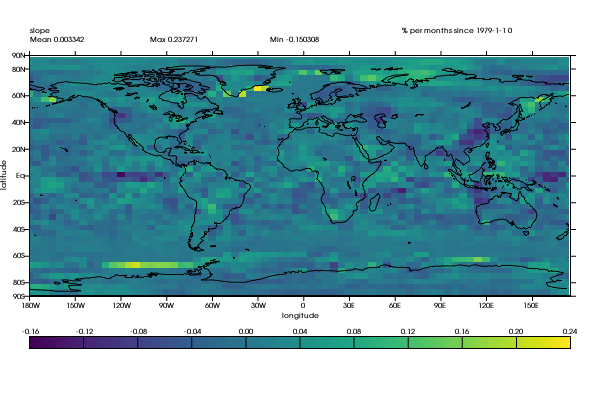

In [17]:
x = vcs.init(bg=True,geometry=(600,400))
red = vcs.create1d()
# Set color
red.linecolor = "red"
# Set y domain
red.datawc_y1 = 55
red.datawc_y2 = 65
# create a copy for blue line
blue = vcs.create1d(source=red)
# reset the color
blue.linecolor = "blue"
x.plot(ts, red)
x.plot(ts_detrended, blue)
#x.clear()
#x.plot(coeff)

In [ ]:
f = cdms2.open("https://vesg.ipsl.upmc.fr/thredds/dodsC/cmip5/output1/IPSL/IPSL-CM5A-LR/1pctCO2/mon/atmos/Amon/r1i1p1/v20110427/tas/tas_Amon_IPSL-CM5A-LR_1pctCO2_r1i1p1_185001-198912.nc")